# This code is written mainly to ascertain the differences between different kernels of SVR and Linear & Polynomial Regression.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

Reading the data

In [4]:
data = pd.read_csv("C:/Users/ahmet/OneDrive/Masaüstü/Python Files/Position_Salaries.csv")

Obtaining the necessary columns as dataframes

In [5]:
x = data.iloc[:,1:2] #level
y = data.iloc[:,2:]  #salary

Data conversion from dataframe to numpy array

In [6]:
X = x.values
Y = y.values

Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg1 = LinearRegression()
lin_reg1.fit(X, Y)

LinearRegression()

Polynomial Regression

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(X)

lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, Y)

LinearRegression()

Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
x_scaled = sc1.fit_transform(X)

sc2 = StandardScaler()
y_scaled = sc2.fit_transform(Y)

### Support Vector Regression (SVR) Model

In [10]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf")
svr_lin = SVR(kernel="linear")
svr_poly = SVR(kernel="poly")

svr_rbf.fit(x_scaled, y_scaled.ravel())
svr_lin.fit(x_scaled, y_scaled.ravel())
svr_poly.fit(x_scaled, y_scaled.ravel())

SVR(kernel='poly')

### Visualisation

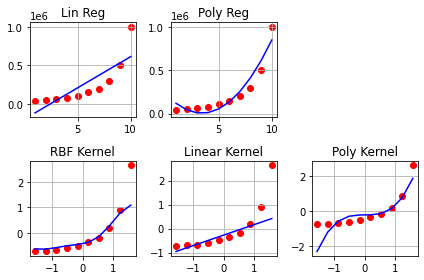

In [11]:
plt.subplot(2,3,1)
plt.scatter(X, Y, color="r")
plt.plot(X, lin_reg1.predict(X), color="b")
plt.title("Lin Reg")
plt.grid(True)

plt.subplot(2,3,2)
plt.scatter(X, Y, color="r")
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color="b")
plt.title("Poly Reg")
plt.grid(True)

plt.subplot(2,3,4)
plt.scatter(x_scaled, y_scaled, color="r")
plt.plot(x_scaled, svr_rbf.predict(x_scaled), color="b")
plt.title("RBF Kernel")
plt.grid(True)

plt.subplot(2,3,5)
plt.scatter(x_scaled, y_scaled, color="r")
plt.plot(x_scaled, svr_lin.predict(x_scaled), color="b")
plt.title("Linear Kernel")
plt.grid(True)

plt.subplot(2,3,6)
plt.scatter(x_scaled, y_scaled, color="r")
plt.plot(x_scaled, svr_poly.predict(x_scaled), color="b")
plt.title("Poly Kernel")
plt.grid(True)

plt.tight_layout()